# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [2]:
#import libraries
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
df = pd.read_csv('progresa_sample.csv')
df['poor'] = df['poor'].apply(lambda x: 1 if x == 'pobre' else 0) #recode variable 'poor'
df['progresa'] = df['progresa'].apply(lambda x: 1 if x == 'basal' else 0) #recode variable 'progresa'
df.head()

,year,sex,indig,dist_sec,sc,grc,fam_n,min_dist,dist_cap,poor,...,hohedu,hohwag,welfare_index,hohsex,hohage,age,village,folnum,grc97,sc97
0,97,0.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,1,7,1.0
1,98,0.0,0.0,4.473,1.0,8.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,14,163,1,7,1.0
2,97,1.0,0.0,4.473,1.0,6.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,12,163,2,6,1.0
3,98,1.0,0.0,4.473,1.0,7.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,13,163,2,6,1.0
4,97,0.0,0.0,4.473,1.0,2.0,7,21.168384,21.168384,1,...,6,0.0,583.0,1.0,35.0,8,163,3,2,1.0


In [4]:
summary = df.describe()
summary = summary.transpose() #transpose the df
summary.drop(['village','year','folnum']).sort_index() #drop village, year, folnum and then alphabetized by variable name

,count,mean,std,min,25%,50%,75%,max
age,77250.0,11.366460,3.167744,6.000000,9.000000,11.000000,14.000000,17.000000
dist_cap,77250.0,147.674452,76.063134,9.465392,92.327050,132.001494,184.445225,359.774457
dist_sec,77250.0,2.418910,2.234109,0.000000,0.574000,2.279000,3.582000,14.879000
fam_n,77250.0,7.215715,2.352900,1.000000,6.000000,7.000000,9.000000,24.000000
grc,70701.0,3.963537,2.499063,0.000000,2.000000,4.000000,6.000000,14.000000
grc97,77250.0,3.705372,2.572387,0.000000,1.000000,4.000000,6.000000,14.000000
hohage,77240.0,44.436717,11.620372,15.000000,36.000000,43.000000,51.000000,98.000000
hohedu,77250.0,2.768104,2.656106,0.000000,0.000000,2.000000,4.000000,20.000000
hohsex,77230.0,0.925185,0.263095,0.000000,1.000000,1.000000,1.000000,1.000000
hohwag,77250.0,586.985312,788.133664,0.000000,120.000000,500.000000,750.000000,14000.000000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [41]:
#calcualte the average of treatment and control group
df_poor97= df[np.logical_and(df['poor']==1, df['year']==97)]
df_poor_sum= df_poor97.groupby('progresa').mean().transpose() 
df_poor_sum.reset_index(inplace=True) # new column: variable name
df_poor_sum['Difference (Treat - Control)'] = df_poor_sum[1] - df_poor_sum[0] 

#calculate p-value
column_list = [x for x in df_poor97.columns if x != 'progresa'] # get a list of all columns in the dataframe without the progresa column
t_test_results = {} # create an empty dictionary
for column in column_list:    # loop over column_list and execute code explained above
    groupT = df_poor97[column].where(df_poor97.progresa== 1).dropna()
    groupC = df_poor97[column].where(df_poor97.progresa== 0).dropna()
    t_test_results[column] = stats.ttest_ind(groupT,groupC)[1]   # add the output to the dictionary 

results_df = pd.DataFrame.from_dict(t_test_results,orient='Index')
results_df.columns = ['p-value']
results_df.reset_index(inplace=True) # new column: variable name

#merge two dataframe
df_poor_sum = pd.merge(df_poor_sum, results_df, on = 'index') 

#delete uninterested rows
values = ['village', 'poor', 'folnum', 'year']
df_poor_sum = df_poor_sum[df_poor_sum['index'].isin(values) == False] 


# rename columns
df_poor_sum.rename({1:'Average value (Treatment villages)',   
            0:'Average value (Control villages)',
            'index': 'Variable name'}, axis = 1, inplace = True)

#change column orders
df_poor_sum = df_poor_sum[["Variable name", "Average value (Treatment villages)", "Average value (Control villages)", "Difference (Treat - Control)", "p-value"]]
df_poor_sum.sort_values(by='Variable name')

,Variable name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
15,age,10.716991,10.742023,-0.025032,4.785594e-01
8,dist_cap,150.829074,153.769730,-2.940656,8.415005e-04
3,dist_sec,2.453122,2.507662,-0.054540,3.569843e-02
6,fam_n,7.281327,7.302469,-0.021142,4.271039e-01
5,grc,3.531599,3.543050,-0.011450,6.890151e-01
18,grc97,3.531599,3.543050,-0.011450,6.890151e-01
14,hohage,43.648828,44.276918,-0.628090,1.796243e-06
10,hohedu,2.663139,2.590348,0.072791,1.105093e-02
13,hohsex,0.924656,0.922947,0.001709,5.711858e-01
11,hohwag,544.339544,573.163558,-28.824015,3.253835e-04


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

* A: yes, there are statistically significant differences between treatment and control villages at variables such as dist_cap, dist_sec, hohage, hohedu, hohwag, min_dist, sex, welfare_index.
* B: there are differences at baseline, the difference we observed between treatment and control group after treatment might not be the effect of treatment but the already existed difference. 
* C: we have to subtract the effect of the basline when measuring the difference after treatment. In other words, it would be better to use the difference-in difference methods. 

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

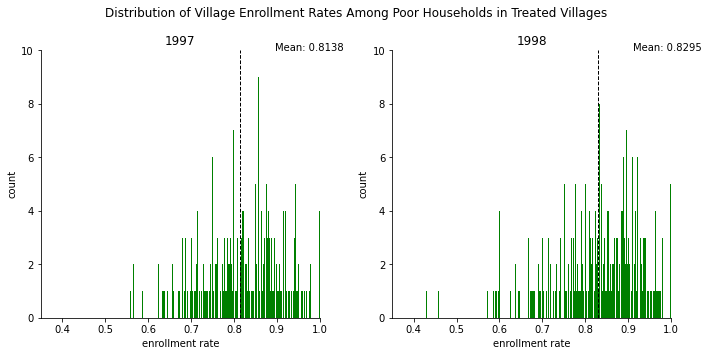

In [32]:
df_poor= df[df['poor']==1]

#select rows with data in 1997/1998 and treatment group
df_97_T = df_poor.loc[np.logical_and(df_poor['year']==97, df_poor['progresa']== 1.0),['sc','progresa','year','village']] # select 1997 and treatment 
df_98_T = df_poor.loc[np.logical_and(df_poor['year']==98, df_poor['progresa']== 1.0),['sc','progresa','year','village']] # select 1998 and treatment 

# compute the enrollment rate of each village
rate97_T = df_97_T.groupby('village').mean()['sc'] #1997 
rate98_T = df_98_T.groupby('village').mean()['sc'] #1998

#histogram
fig = plt.figure(figsize=[10,5])
fig.suptitle('Distribution of Village Enrollment Rates Among Poor Households in Treated Villages')

#97
axs1 = plt.subplot(1, 2, 1)
num_of_bins = len(rate97_T)
plt.hist(rate97_T, color='green', bins = int(num_of_bins))
plt.axvline(rate97_T.mean(), color='k', linestyle='dashed', linewidth=1) #add average line
plt.text(rate97_T.mean()*1.1, 10, 'Mean: {:.4f}'.format(rate97_T.mean())) #add average text
plt.title('1997')
plt.ylim([0, 10])
plt.xlim([0.35, 1])
axs1.set_ylabel('count')
axs1.set_xlabel('enrollment rate')
axs1.spines['right'].set_visible(False)
axs1.spines['top'].set_visible(False)

#98
axs2 = plt.subplot(1, 2, 2)
num_of_bins = len(rate98_T)
plt.hist(rate98_T, color='green', bins = int(num_of_bins))
plt.axvline(rate98_T.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(rate98_T.mean()*1.1, 10, 'Mean: {:.4f}'.format(rate98_T.mean()))
plt.title('1998')
plt.ylim([0, 10])
plt.xlim([0.35, 1])
axs2.set_ylabel('count')
axs2.set_xlabel('enrollment rate')
axs2.spines['right'].set_visible(False)
axs2.spines['top'].set_visible(False)

#adjust spacing between two subplots
fig.tight_layout()
plt.show()

In [36]:
# compute t-test of the enrollment rate in 1997 & 1998 at the household level
print(stats.ttest_ind(df_97_T['sc'].dropna(),df_98_T['sc'].dropna())) 

Ttest_indResult(statistic=-6.069273929290983, pvalue=1.2976490728161e-09)


* `Does there appear to be a difference? Is this difference statistically significant?` <br>
The data of 1997 seems to be more evenly distributed between 0.6 - 1.0, and the data of 1998 concentrate more between 0.75 - 1.0.The average enrollment rate in 1998 is slightly higher than that of 1997. From the result of paired sample t-test, there is a statistically significant difference between the two distribution (p-value < 0.05).

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

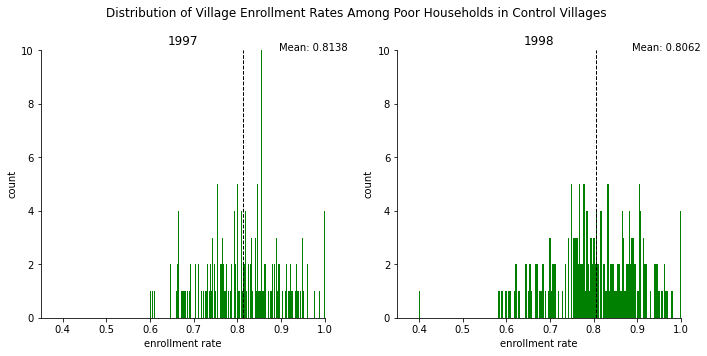

In [8]:
#select rows with data in 1997/1998 and control group
df_97_C = df_poor.loc[np.logical_and(df_poor['year']==97, df_poor['progresa']== 0),['sc','progresa','year','village']] #1997 control
df_98_C = df_poor.loc[np.logical_and(df_poor['year']==98, df_poor['progresa']== 0),['sc','progresa','year','village']] #1998 control

# compute the enrollment rate of each village
rate97_C = df_97_C.groupby('village').mean()['sc'] #1997
rate98_C = df_98_C.groupby('village').mean()['sc'] #1998

#histogram
fig = plt.figure(figsize=[10,5])
fig.suptitle('Distribution of Village Enrollment Rates Among Poor Households in Control Villages')

#97
axs1 = plt.subplot(1, 2, 1)
num_of_bins = len(rate97_C)
plt.hist(rate97_C, color='green', bins = int(num_of_bins))
plt.axvline(rate97_C.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(rate97_C.mean()*1.1, 10, 'Mean: {:.4f}'.format(rate97_C.mean()))
plt.title('1997')
plt.ylim([0, 10])
plt.xlim([0.35, 1])
axs1.set_ylabel('count')
axs1.set_xlabel('enrollment rate')
axs1.spines['right'].set_visible(False)
axs1.spines['top'].set_visible(False)

#98
axs2 = plt.subplot(1, 2, 2)
num_of_bins = len(rate98_C)
plt.hist(rate98_C, color='green', bins = int(num_of_bins))
plt.axvline(rate98_C.mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(rate98_C.mean()*1.1, 10, 'Mean: {:.4f}'.format(rate98_C.mean()))
plt.title('1998')
plt.ylim([0, 10])
plt.xlim([0.35, 1])
axs2.set_ylabel('count')
axs2.set_xlabel('enrollment rate')
axs2.spines['right'].set_visible(False)
axs2.spines['top'].set_visible(False)

#adjust spacing between two subplots
fig.tight_layout()
plt.show()

In [37]:
# compute t-test of the enrollment rate in 1997 & 1998  at the household level
print(stats.ttest_ind(df_97_C['sc'].dropna(),df_98_C['sc'].dropna()))

Ttest_indResult(statistic=1.4355850984946787, pvalue=0.1511345297015608)


* `Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?` <br>
Except for the distribution of 1998 being more evenly distributed between 0.6 to 1, it seems that the distributions of the two do not differ a lot. The result of independent sample t-test shows that there is no statistically significant difference between the two distributions (p-value = 0.15). If a difference between the 97 & 98 control groups is observed, we have to subtract the time effect from the treatment effect (the difference between the 1998 and 1997 control group). That is, when measuring the impact of the PROGRESA program on the enrollment rate, in addition to only subtracting the 1998 treatment group with the 1997 treatment group, we also have to subtract (1998 control - 1997 control) with the 1998 treatment group to eliminate the time effect. 

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [11]:
# average enrollment rate 1998
ER98T = df_98_T.mean()['sc']
ER98C = df_98_C.mean()['sc'] 
print('1998 average enrollment rate (treatment) = {:.4f}'.format(ER98T)) #average enrollment rate among poor households in the Treatment villages 
print('1998 average enrollment rate (control) = {:.4f}'.format(ER98C)) #average enrollment rate among poor households in the Control villages

# t-test
a = stats.ttest_ind(df_98_T['sc'].dropna(), df_98_C['sc'].dropna())
print(a)

1998 average enrollment rate (treatment) = 0.8465
1998 average enrollment rate (control) = 0.8076
Ttest_indResult(statistic=8.358720567418374, pvalue=6.636344447523235e-17)


* `What do you conclude?` <br>
Since the p-value is smaller than 0.05, we can conclude that there is a significant difference between the treatment group and the control group.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [12]:
df98 = df_poor.loc[df_poor['year']==98,:]
smf.ols(formula = 'sc ~ progresa', data=df98).fit().summary() # fitting the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           6.64e-17
Time:                        22:25:38   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8076      0.004    220.676      0.000       0.800       0.815
progresa       0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* `Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.`<br>
The likelihood of a child enrolling increases by 3.88 percent when the treatment increases by 1 units. 
* `How does your regression estimate compare to your t-test estimate from part 2.1?`<br>
The results of the both statistical tests infer that Progresa has an statistically significant impact on the enrollment rate. 
* `Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? `<br>
Yes, since the overall p-value of the model = 6.64e-17, smaller than 0.05, we can reject the null hypothesis. 
* `What is the counterfactual assumption underlying this regression?`<br>
The villages in the treatment groups and the control groups are randomly assigned.  

### 2.3 Multiple Regression

Re-run the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [13]:
smf.ols(formula = 'sc ~ progresa + sex + age + indig + dist_sec + hohedu + hohwag', data=df98).fit().summary() # fitting the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1428.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:25:38   Log-Likelihood:                -7671.8
No. Observations:               27340   AIC:                         1.536e+04
Df Residuals:                   27332   BIC:                         1.543e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5239      0.010    159.309      0.000       1.505       1.543
progresa       0.0356      0.004      8.908      0.000       0.028       0.043
sex            0.0310      0.004      7.994      0.000       0.023       0.039
age           -0.0655      0.001    -95.682      0.000      -0.067      -0.064
indig          0.0468      0.004     11.224      0.000       0.039       0.055
dist_sec      -0.0119      0.001    -13.635      0.000      -0.014      -0.010
hohedu         0.0087      0.001     11.072      0.000       0.007       0.010
hohwag     -6.356e-07    2.8e-06     -0.227      0.821   -6.13e-06    4.85e-06
==============================================================================
Omnibus:                     2974.468   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4048.830
Skew:                          -0.935   Prob(JB):                         0.00
Kurtosis:                       3.239   Cond. No.                     4.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* `How do the controls affect the point estimate of treatment effect?`<br>
The controls decrease the point estimate of treatment effect. 
* `How do the controls affect the standard error on the treatment effect? `<br>
The controls slightly decrease the  standard error on the treatment effect.
* `How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?`<br>
The increased R-squared indicates that the ability the model can explain the real data increased by adding control variables.
* `Interpet the coefficient associated with the dist_sec variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?`<br>
Yes, the p-value is smaller than 0.05, indicating that the household's distance from a secondary school has a causal impact on educational attainment.

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [38]:
from tabulate import tabulate
Table = [["Progresa\year", 1997,1998],
         ["Control", df_97_C.mean()['sc'], df_98_C.mean()['sc'] ],
         ["Treatment", df_97_T.mean()['sc'], df_98_T.mean()['sc']]]
print(tabulate(Table, headers="firstrow", tablefmt="rst", floatfmt="0.4f"))

did = df_98_T.mean()['sc']- df_98_C.mean()['sc'] - (df_97_T.mean()['sc']-df_97_C.mean()['sc'])
print(did)

===============  ======  ======
Progresa\year      1997    1998
===============  ======  ======
Control          0.8152  0.8076
Treatment        0.8227  0.8465
===============  ======  ======
0.031331280319323085


* `What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?` <br>
The differnce-in-difference estimate of the impact is 0.0313. The estimate is really close to the point estimate of treatment effect in the regression models, which is 0.0075 units different from the earlier result. 
* `What is the counterfactual assumption underlying this estimate? ` <br>
The conterfactual of the post treatment group =  pre treatment + (the difference between pre- and post-control). The assumptions are:
    1. “Parallel trends”: Trends in pre-treatment outcomes are the same in treatment and control groups
    2. Composition of treatment and control groups stable across time
    3. No spillover effects

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [15]:
# (i)
# dif-in-dif formula: Y = B0 + B1*Time + B2*Intervention + B3*(Time*Intervention)
df_poor['progresa*year'] = df_poor['progresa']*df_poor['year']
model = smf.ols(formula='sc ~ year + progresa + progresa*year', data=df_poor).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           2.76e-18
Time:                        22:25:38   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.5474      0.497      3.112

/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_3710/811181983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_poor['progresa*year'] = df_poor['progresa']*df_poor['year']


In [16]:
#(ii)
model = smf.ols(formula='sc ~ progresa + year + year*progresa + sex + age + indig + dist_sec + hohedu + hohwag', 
                data=df_poor).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2498.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:25:38   Log-Likelihood:                -16717.
No. Observations:               58165   AIC:                         3.345e+04
Df Residuals:                   58155   BIC:                         3.354e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.1247      0.424     -2.653

* `What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.` <br>
On average the enrollment rate of people in the treatment group are -3.0316 percent lower than those in the control group. The significant interaction effect shows that the enrollment rate of the treament group increase 0.0313 by year. Standard error represents the average distance that the observed values fall from the regression line.
* `Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the progresa coefficient between (i) and (ii)?` <br>
The interaction effect of year and progresa increases by 0.001 and the estimate average difference of the enrollment rate between the treatment and control group increases by 0.009. Because these control variables are not experimentally controlled, isolating the control variable’s effects from the relationship between the variable of interest (sc and progresa), and thus lead to the change in the results. 
* `How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?`<br>
The estimate from 2.4 and from (i) are almost the same (both are 0.313). The estimate from (ii) is also nearly the same (0.001 different from the other two).
* `What is the counterfactual assumption underlying regression (ii)?`<br>
    1. “Parallel trends”: Trends in pre-treatment outcomes are the same in treatment and control groups
    2. Composition of treatment and control groups stable across time
    3. No spillover effects

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [17]:
# (a)
df_nonpoor = df[df['poor']== 0]
df_nonpoor['progresa*year'] = df_nonpoor['progresa']*df_nonpoor['year']
model = smf.ols(formula='sc ~ year + progresa + progresa*year', data=df_nonpoor).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.332
Date:                Sun, 06 Feb 2022   Prob (F-statistic):           0.000276
Time:                        22:25:38   Log-Likelihood:                -5448.5
No. Observations:               10425   AIC:                         1.090e+04
Df Residuals:                   10421   BIC:                         1.093e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5712      1.241     -0.460

/var/folders/2h/4fcst_952sn2rw58_smpkpzw0000gn/T/ipykernel_3710/774973052.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonpoor['progresa*year'] = df_nonpoor['progresa']*df_nonpoor['year']


In [39]:
#(b)
print(smf.ols(formula='fam_n ~ year + progresa + progresa*year', data=df_poor).fit().summary()) #family size
print(smf.ols(formula='min_dist ~ year + progresa + progresa*year', data=df_poor).fit().summary()) #min distance to an urban center
print(smf.ols(formula='age ~ year + progresa + progresa*year', data=df_poor).fit().summary()) #age


                            OLS Regression Results                            
Dep. Variable:                  fam_n   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4205
Date:                Mon, 07 Feb 2022   Prob (F-statistic):              0.738
Time:                        00:03:45   Log-Likelihood:            -1.4833e+05
No. Observations:               65392   AIC:                         2.967e+05
Df Residuals:                   65388   BIC:                         2.967e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.3025      2.887      2.530

* `Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?` <br>
On average there is no statistically significant impacts of PROGRESA on the school enrollment of the non-poor. (p-value = 0.738)
* `Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.`<br>
Perhaps the randomization failed so that the treatment and control villages were different to begin with. Another explanation could be the possible spillover effects from poor to non-poor in treated village. The poor household get money and hence become unpoor. 
* `Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? `<br>
From the results of the outcomes of the poor households I tried (family size, age, min distance to an urban center), I do not observed any impacts of PROGRESA on other aspects of the welfare of poor households.

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Using several different empirical frameworks, we have explored the impact of the PROGRESA program on enrollment rates of poor households in Mexico. In general, it appears that PROGRESA did have positive impact on the school enrollment rates, though the exact estimate depends on the method used to measure impact. After controlling for other observable characteristics, the most reliable difference-in-difference estimator estimates that PROGRESA raised enrollment rates by roughly 3.13 percentage points. A separate estimator, that includes externalities on non-poor households, produces a more conservative, and statistically insignificant, estimate.

*Discuss your results here*